<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">




<br><br><br>
<h2><font color="#00586D" size=4>Capstone VI</font></h2>



<h1><font color="#00586D" size=5>Análisis de un problema de clasificación con deep learning</font></h1>
<br><br>

<div align="right">
<font color="#00586D" size=3>Fernando Rubio, Daniel González</font><br>
<font color="#00586D" size=3>Máster en Ciencia de Datos e Ingeniería de Datos en la Nube</font><br>
<font color="#00586D" size=3>Universidad de Castilla-La Mancha</font>

</div>

In [1]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf
from PIL import Image
import seaborn as sns
import sklearn.metrics as metrics
import sklearn.metrics as confusion_matrix
from sklearn.model_selection import train_test_split
#import autokeras as ak

**Nota**: en este notebook es esencial utilizar la GPU para entrenar nuestras redes.

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Índice</font></h2>


* [1. Introducción](#section1)
* [2. Dataset](#section2)
* [3. Preprocesamiento de datos](#section3)
* [4. Ejemplo](#section4)
* [5. Creación de un modelo desde cero](#section5)
* [6. Ajuste de hiperparámetros](#section6)
* [7. Modelos pre-entrenados](#section7)
* [8. Data augmentation](#section8)
* [9. Autokeras](#section9)

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section1"></a> 
## <font color="#00586D"> 1. Introducción</font>
<br>

El objetivo del Capstone es **simular un análisis completo de un problema de clasificación de imágenes usando Deep Learning**.

El análisis está compuesto de una serie de pasos que iremos viendo detenidamente uno por uno, que os puede servir de guía para seguir a la hora de resolver un problema con Deep Learning. Los **pasos** que vamos a seguir son los siguientes:

1. **Dataset**: Descarga y previsualización de los datos.
2. **Preprocesamiento de los datos**: prepararemos las imágenes para que puedan ser entrenadas.
3. **Modelo desde cero**: Creación de una red neuronal desde cero.
4. **Ajuste de hiperparámetros**: Mejora del modelo anterior mediante el ajuste de hiperparámetros.
5. **Modelos pre-entrenados (fine-tunning)**: Uso de técnicas de *Finetunning* sobre un modelo pre-entrenado.
6. **Data augmentation (Opcional)**: Uso de *data augmentation* en el dataset.
7. **Conclusión**: se deberá sacar unas conclusiones a partir de los resultados obtenidos, decidiendo cual de los modelos entrenados podríamos desplegar en producción para usarlo.

Los puntos a completar son del 3 al 7, en **cada punto se detalla exactamente qué se tiene que hacer**, es decir, habrá bloques de código en blanco y se detallará las arquitectura de las redes y la configuración de los entrenamientos, por lo que las redes a crear serán las indicadas en cada paso.

Al final de cada paso habrá que comentar los resultados obtendos en los entrenamientos, sacando **conclusiones de los experimentos** que vamos a llevar acabo, justificando y midiendo el rendimiento de los modelos obtenidos según las técnicas que utilicemos. La evaluación de los modelos se realizará en terminos de tasa de aciertos y la matriz de confusión de las clases.

_**Nota**: ejecuta el siguiente código para montar tu Drive y no perder los datos que vayamos a descargar. Además se hará un `cd` hacia el drive para guardar ahí todos los datos generados y descargados_

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/

/content/drive/MyDrive


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section2"></a> 
## <font color="#00586D"> 2. Dataset</font>
<br>
El dataset utilizado está compuesto por imágenes de distintas razas de perro. El dataset contiene 12.891 imágenes con 74 razas, por lo tanto, el objetivo será crear y entrenar un módelo que clasifique la raza de un perro a partir de una imagen. Para descargar el dataset ejecuta la siguiente celda:

In [ ]:
!wget 'https://pruebasaluuclm-my.sharepoint.com/:u:/g/personal/fernando_rubio_uclm_es/ESpljekZA9dAgxsfc3qIDvEBMT76g8rPDOpMwgDwHe0BKw?download=1'
!mv 'ESpljekZA9dAgxsfc3qIDvEBMT76g8rPDOpMwgDwHe0BKw?download=1' dog-images.zip
!unzip -q dog-images.zip

--2023-04-03 09:49:30--  https://pruebasaluuclm-my.sharepoint.com/:u:/g/personal/fernando_rubio_uclm_es/ESpljekZA9dAgxsfc3qIDvEBMT76g8rPDOpMwgDwHe0BKw?download=1
Resolving pruebasaluuclm-my.sharepoint.com (pruebasaluuclm-my.sharepoint.com)... 13.107.136.8, 13.107.138.8, 2620:1ec:8f8::8, ...
Connecting to pruebasaluuclm-my.sharepoint.com (pruebasaluuclm-my.sharepoint.com)|13.107.136.8|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/fernando_rubio_uclm_es/Documents/dog-dataset.zip?ga=1 [following]
--2023-04-03 09:49:32--  https://pruebasaluuclm-my.sharepoint.com/personal/fernando_rubio_uclm_es/Documents/dog-dataset.zip?ga=1
Reusing existing connection to pruebasaluuclm-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 498626796 (476M) [application/x-zip-compressed]
Saving to: ‘ESpljekZA9dAgxsfc3qIDvEBMT76g8rPDOpMwgDwHe0BKw?download=1’

ESpljekZA9dAgxsfc3q 100%[===================>] 475.53M  33.2MB/s    in 17s     

2023

Se descargará un archivo `dog-images.zip` que se descomprimirá automáticamente creando la carpeta `dog-dataset` que contiene el dataset completo. La estructura de los ficheros descargados sera:

```
--> dog-images.zip
--> dog-dataset/
-->    test.csv
-->    train.csv
-->    valid.csv
-->    dog-images/
-->        Afghan_hound/
-->        African_hunting_dog/
-->        ...
```


En el interior de la carpeta `dog-dataset` se encuentrarn 3 ficheros *CSVs* y otra carpeta (`dog-images`):

* Carpeta `dog-images`: contiene todas las imágenes del dataset. Las imágenes están distribuidas por carpetas según las disintas razas (74 carpetas en total). El nombre de cada carpeta corresponde con la raza.
* `train.csv`: conjunto de datos para el entrenamiento, 8.992 imágenes. El fichero está en formato *CSV* y cada fila se corresponde con una imagen distinta. El *CSV* tiene 2 columnas, la columna *label* que corresponde a la clase (raza) y la columna *path* que correponde con la ruta donde está cada imagen en la carpeta `dog-images`.
* `valid.csv`: conjunto de datos para la validación, 1.894 imágenes. Mismo formato que `train.csv`.
* `test.csv`: conjunto de datos para el test, 2.005 imágenes. Mismo formato que `train.csv`.

A continuación se muestran varias imágenes del dataset.

In [ ]:
def show_images(img_paths):
    fig=plt.figure(figsize=(20, 20))
    index = np.random.randint(len(img_paths), size=100)
    for i in range(100):
        fig.add_subplot(10, 10, i+1)
        plt.axis('off')
        img = Image.open(img_paths[index[i]])
        plt.imshow(img)
    plt.show()
    
files = [f for f in glob.glob("dog-dataset/dog-images/**/*.jpg", recursive=True)]
show_images(files)

Output hidden; open in https://colab.research.google.com to view.

Podemos obserar las siguientes características que pueden complicar el problema:

- Las imágenes son de **diferentes tamaños**.
- Hay **diferentes objetos en las imágenes**.

Vamos a crear un lista (`classes`) con el nombre de las razas de los perros que serán las clases en las que clasificarán los modelos que creemos:

In [4]:
classes = [f.split('/')[-1] for f in glob.glob("dog-dataset/dog-images/**")]
classes

['bluetick',
 'borzoi',
 'Norwegian_elkhound',
 'American_Staffordshire_terrier',
 'Irish_terrier',
 'Lakeland_terrier',
 'Sealyham_terrier',
 'Dandie_Dinmont',
 'Scotch_terrier',
 'soft-coated_wheaten_terrier',
 'golden_retriever',
 'Labrador_retriever',
 'Gordon_setter',
 'clumber',
 'cocker_spaniel',
 'groenendael',
 'briard',
 'Old_English_sheepdog',
 'German_shepherd',
 'Greater_Swiss_Mountain_dog',
 'Bernese_mountain_dog',
 'bull_mastiff',
 'Tibetan_mastiff',
 'chow',
 'keeshond',
 'Brabancon_griffon',
 'Pembroke',
 'Cardigan',
 'miniature_poodle',
 'Mexican_hairless',
 'toy_terrier',
 'bloodhound',
 'Irish_water_spaniel',
 'Sussex_spaniel',
 'Samoyed',
 'otterhound',
 'Shetland_sheepdog',
 'French_bulldog',
 'Australian_terrier',
 'Great_Pyrenees',
 'Maltese_dog',
 'whippet',
 'Boston_bull',
 'Irish_setter',
 'Rottweiler',
 'schipperke',
 'Leonberg',
 'Welsh_springer_spaniel',
 'Pomeranian',
 'Pekinese',
 'Irish_wolfhound',
 'Blenheim_spaniel',
 'basenji',
 'African_hunting_dog'

Vamos a mostrar una imagen aleatoria por cada clase:

In [ ]:
img_per_class = {}

for c in classes:
   files = [f for f in glob.glob(f"dog-dataset/dog-images/{c}/**.jpg")]
   index = np.random.randint(len(files))
   img_per_class[c] = files[index]

fig=plt.figure(figsize=(20, 20))
for i, (k, v) in enumerate(img_per_class.items()):
    fig.add_subplot(10, 10, i+1)
    plt.axis('off')
    img = Image.open(v)
    plt.title(k);
    plt.imshow(img)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Veamos si las clases están balanceadas:

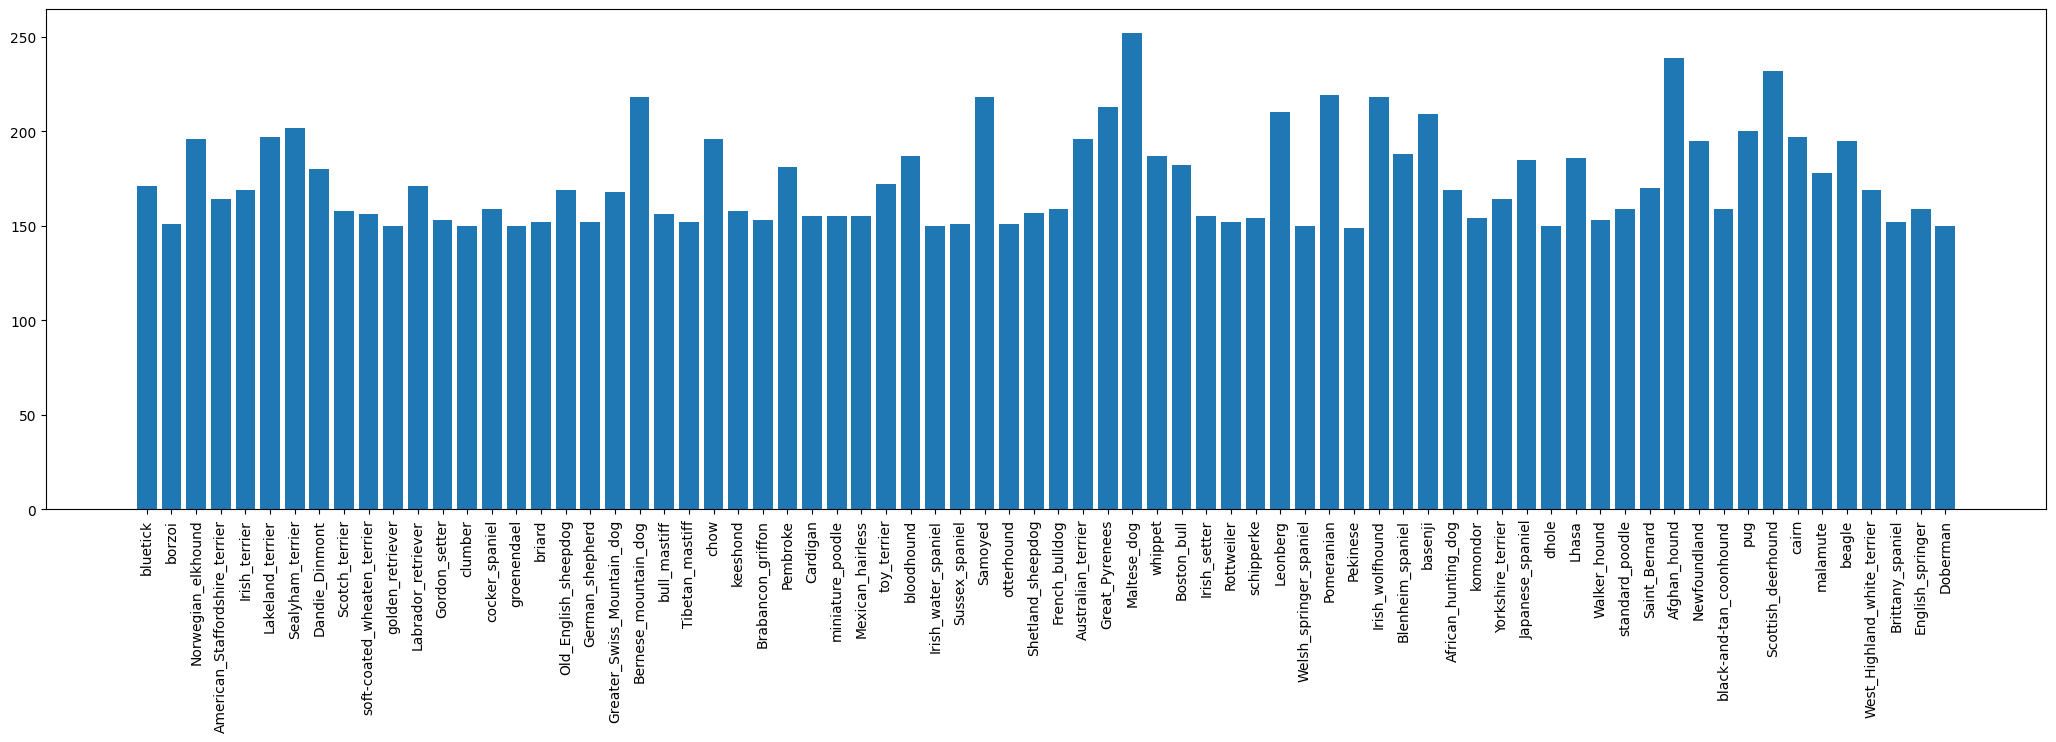

In [ ]:
targets = [len([f for f in glob.glob(f"dog-dataset/dog-images/{c}/**.jpg")]) for c in classes]

fig = plt.figure(figsize=(20, 5))
ax = fig.add_axes([0,0,1,1])
ax.bar(classes,targets)
plt.xticks(rotation='vertical')
plt.show()

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section3"></a> 
## <font color="#00586D"> 3. Preprocesamiento de datos</font>
<br>


En esta sección vamos a cargar los datos creando los dataset para el conjunto de training, de validación y de test. En otras prácticas hemos visto como cargar con `tf.keras.utils.Sequence` y `tf.data.Dataset` batches de imágenes. En este caso, nos vamos a centrar en el segundo, ya que es más eficiente, sobre todo en Colab, como comentamos en la sección de Carga de datos masiva.

En este Capstone os vamos a dar una serie de funciones que permiten ejecutar los experimentos de forma más rápida para que no os tengáis que preocupar por la configuración de la base de datos.

In [5]:
def read_image(image_path, label):
    """
      Cargamos una imagen usando su ruta (path), la convertimos en tensor y la normalizamos
    """
    contents = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(contents, channels=3)
    img = tf.cast(img, tf.float64)
    img /= 255.0
    return img, label

def resize_image(img, label, target_size):
    """
      Redimensionamos una imagen
    """
    resized_img = tf.image.resize(img, target_size)
    return resized_img, label

def get_dataset(image_paths, image_labels, target_size, batch_size, prep_func=None):
    """
      - Generamos un objeto tf.data.Dataset para optimizar el entrenamiento desde los 
        paths de las imagenes
      - Aplicamos las funciones read_image y resize_image a las imagenes
      - Podemos usar una función prep_func si queremos hacer fine-tunning
    """
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, image_labels))
    dataset = dataset.map(read_image)
    dataset = dataset.map(lambda x, y: resize_image(x, y, target_size))  

    if prep_func != None:
        dataset = dataset.map(lambda x, y: (x*255.0, y))
        dataset = dataset.map(lambda x, y: (prep_func(x), y))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(1)
    return dataset

Con estas funciones, podemos crear unos `tf.data.Dataset` que son óptimos a la hora de leer imágenes en memoria y ejecutar los batches y la forma de crearlos y ejecutarlos es la siguiente: 

```python
# definimos el img_size objetivo y el batch_size
img_size = (224,224,3)
batch_size = 32

# esta funcion obtiene la base de datos, e incluso podemos pasarle una preprocessing function
train_dataset = get_dataset(images_train_paths, labels_train, img_size[0:-1], batch_size)

# ya solo nos queda llamar a fit con la base de datos
model.fit(train_dataset, epochs=10)
```

Así es como deberemos llamar al método en celdas sucesivas cuando queramos entrenar nuestras redes.

Aunque tenemos los csv con los conjuntos de `train`, `valid` y `test`, vamos generar las particiones nosotros mismos para ver cómo se hace y para asegurarnos que lo hacemos de forma correcta.


In [6]:
num_to_label = {i: c for i, c in enumerate(classes)}
label_to_num = {c: i for i, c in enumerate(classes)}
image_paths = np.array([f for f in glob.glob("dog-dataset/dog-images/**/*.jpg", recursive=True)])
image_labels =  np.array([label_to_num[f.split('/')[-2]] for f in glob.glob("dog-dataset/dog-images/**/*.jpg", recursive=True)])

In [7]:
shuffler = np.random.permutation(len(image_paths))
image_paths = image_paths[shuffler]
image_labels = image_labels[shuffler]

# Train/valid/test split
x_train_valid, x_test, y_train_valid, y_test = train_test_split(image_paths, image_labels, test_size=0.1, random_state=1234, stratify=image_labels)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=0.2, random_state=5678, stratify=y_train_valid)

print("Train: ", x_train.shape)
print("Valid: ", x_valid.shape)
print("Test: ", x_test.shape)

del x_train_valid, y_train_valid

Train:  (9280,)
Valid:  (2321,)
Test:  (1290,)


Una vez tenemos listas las particiones, ya solo tenemos que crear los datasets con las funciones proporcionadas.

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section4"></a> 
## <font color="#00586D"> 4. Experimento ejemplo</font>
<br>

Aquí os mostramos un ejemplo de experimento y evaluación de un modelo. Podéis basaros en este para los modelos que tenéis que crear vosotros. Además de las gráficas de train y validación, hay una celda que muestra la matriz de confusión de la clase y que deberéis utillizar en los ejercicios.

### <font color="#00586D"> Arquitectura y configuración de la red</font>

La arquitectura de la red debe ser siguiente:
* Tamaño de entrada será `(100, 120, 3)`.
* Capa *Fully connected* con 1 neurona con activación *ReLU*.
* Capa de salida con *softmax*.

Configuración del entrenamiento:
* Función de perdida: `categorical_crossentropy`
* Optimizador: `Adam`
* Learning rate: 0,001
* Epochs: 2
* Tamaño del batch: 128

In [16]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100,120,3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [17]:
# Creamos nuestra red
model = tf.keras.Sequential([
  tf.keras.layers.Input(img_size),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="relu"),
  tf.keras.layers.Dense(len(classes), activation="softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 36000)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 36001     
                                                                 
 dense_2 (Dense)             (None, 74)                148       
                                                                 
Total params: 36,149
Trainable params: 36,149
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Configuramos entrenamiento
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# Entrenamos
history = model.fit(train_dataset, epochs=2, validation_data=valid_dataset)

Epoch 1/2
73/73 [==============================] - 38s 499ms/step - loss: 4.3254 - accuracy: 0.0164 - val_loss: 4.3024 - val_accuracy: 0.0198
Epoch 2/2
73/73 [==============================] - 35s 480ms/step - loss: 4.3020 - accuracy: 0.0195 - val_loss: 4.3010 - val_accuracy: 0.0198


In [20]:
# Evaluamos con el conjunto de test
model.evaluate(test_dataset)

11/11 [==============================] - 4s 341ms/step - loss: 4.3009 - accuracy: 0.0194


[4.300892353057861, 0.01937984488904476]

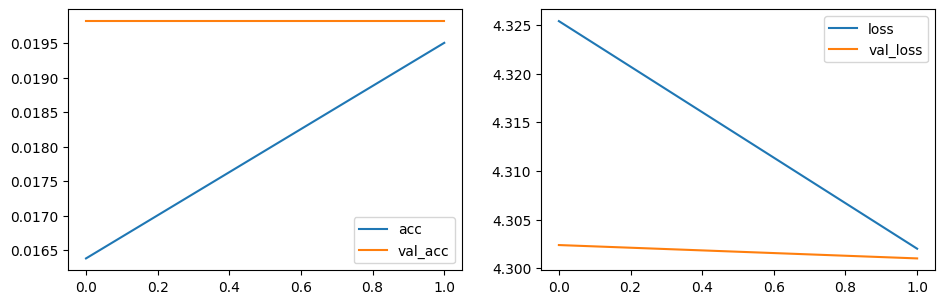

In [21]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 4s 339ms/step


<Axes: >

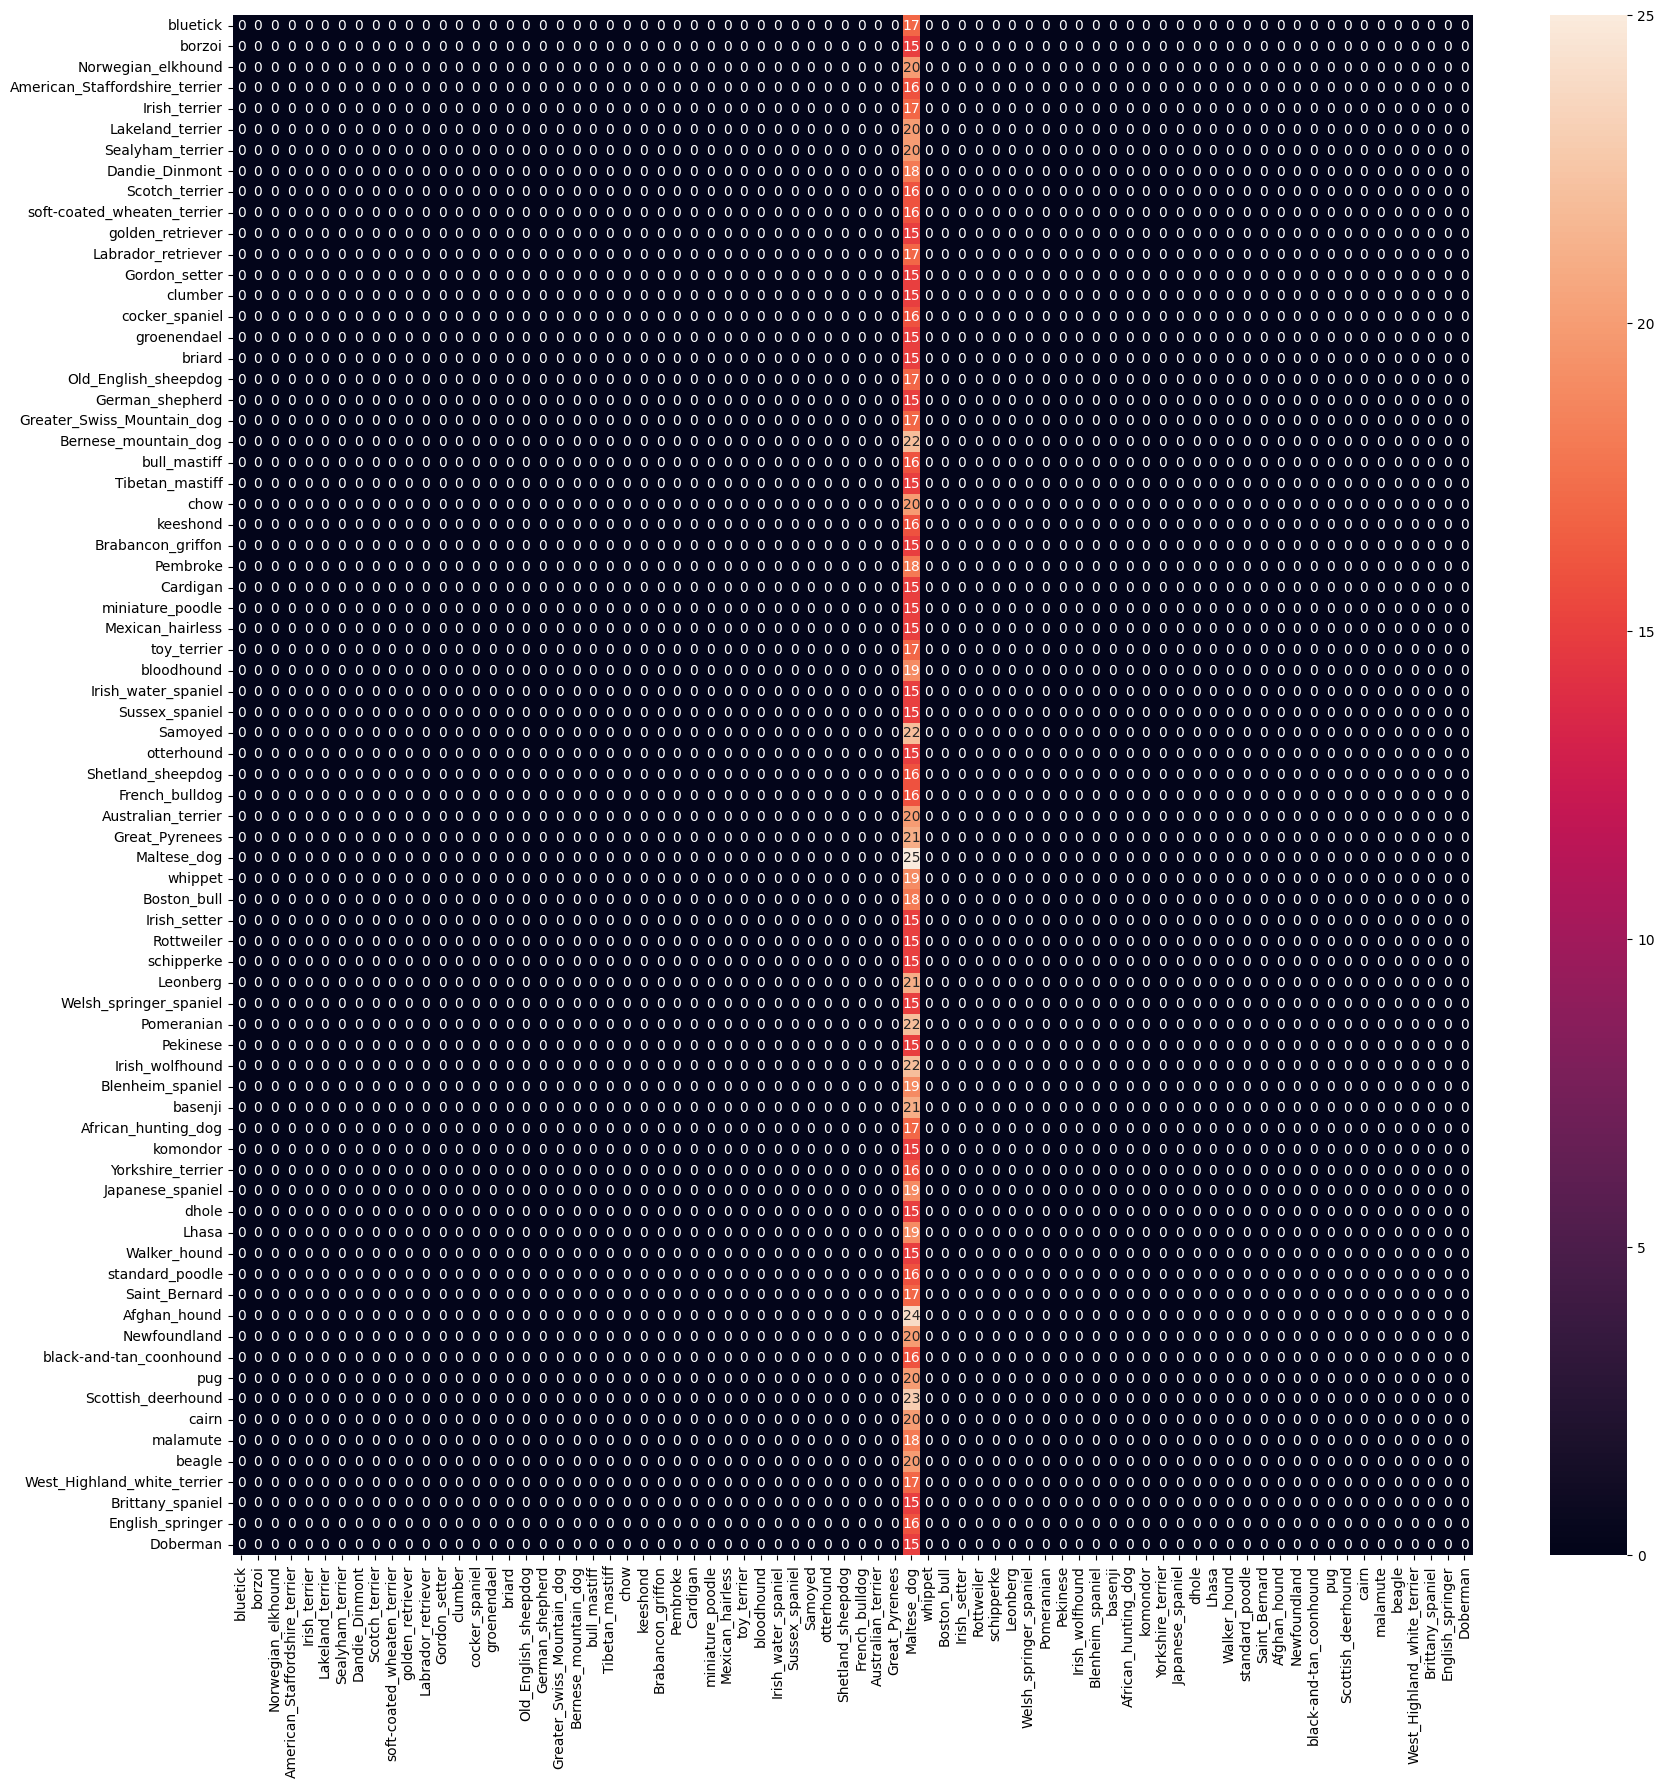

In [22]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section5"></a> 
## <font color="#00586D"> 5. Creación de un modelo desde cero</font>
<br>


En esta sección se diseñará y entrenará una red convolucional siguiendo una estructura de tipo *VGG16* como las que vimos en clase. Una vez entrenada la red, tendrás que evaluar el resultado.

### <font color="#00586D"> Arquitectura y configuración de la red</font>

La arquitectura de la red debe ser siguiente:
* Tamaño de entrada será `(100, 120, 3)`.
* Capa convolucional con 32 kernels de tamaño 5x5 con activación *ReLU*.
* Capa *Max Pooling* con reducción de 2.
* Capa convolucional con 64 kernels de tamaño 5x5 con activación *ReLU*.
* Capa *Max Pooling* con reducción de 2.
* Capa *Fully connected* con 1024 neuronas con activación *ReLU*.
* Capa de salida con *softmax*.

Configuración del entrenamiento:
* Función de perdida: `categorical_crossentropy`
* Optimizador: `Adam`
* Learning rate: 0,001
* Epochs: 10
* Tamaño del batch: 128

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100,120,3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
# COMPLETAR:
#   - Crear la red
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=img_size),
    tf.keras.layers.Conv2D(32,(5,5),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(5,5),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])
model.summary()
#   - Entrena la red
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_dataset,epochs=10,validation_data=valid_dataset)
#   - Evalúa la red
model.evaluate(test_dataset)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 22, 27, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 38016)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)             

[11.002182006835938, 0.06744185835123062]

Obtén las gráficas de evaluación y la matriz de confusión y  extrae conclusiones de estos resultados

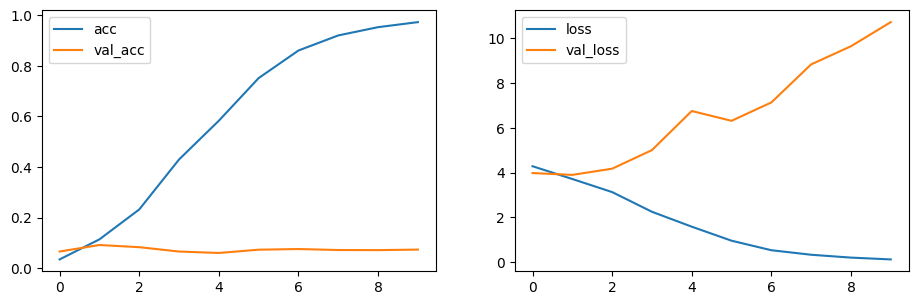

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 6s 605ms/step


<Axes: >

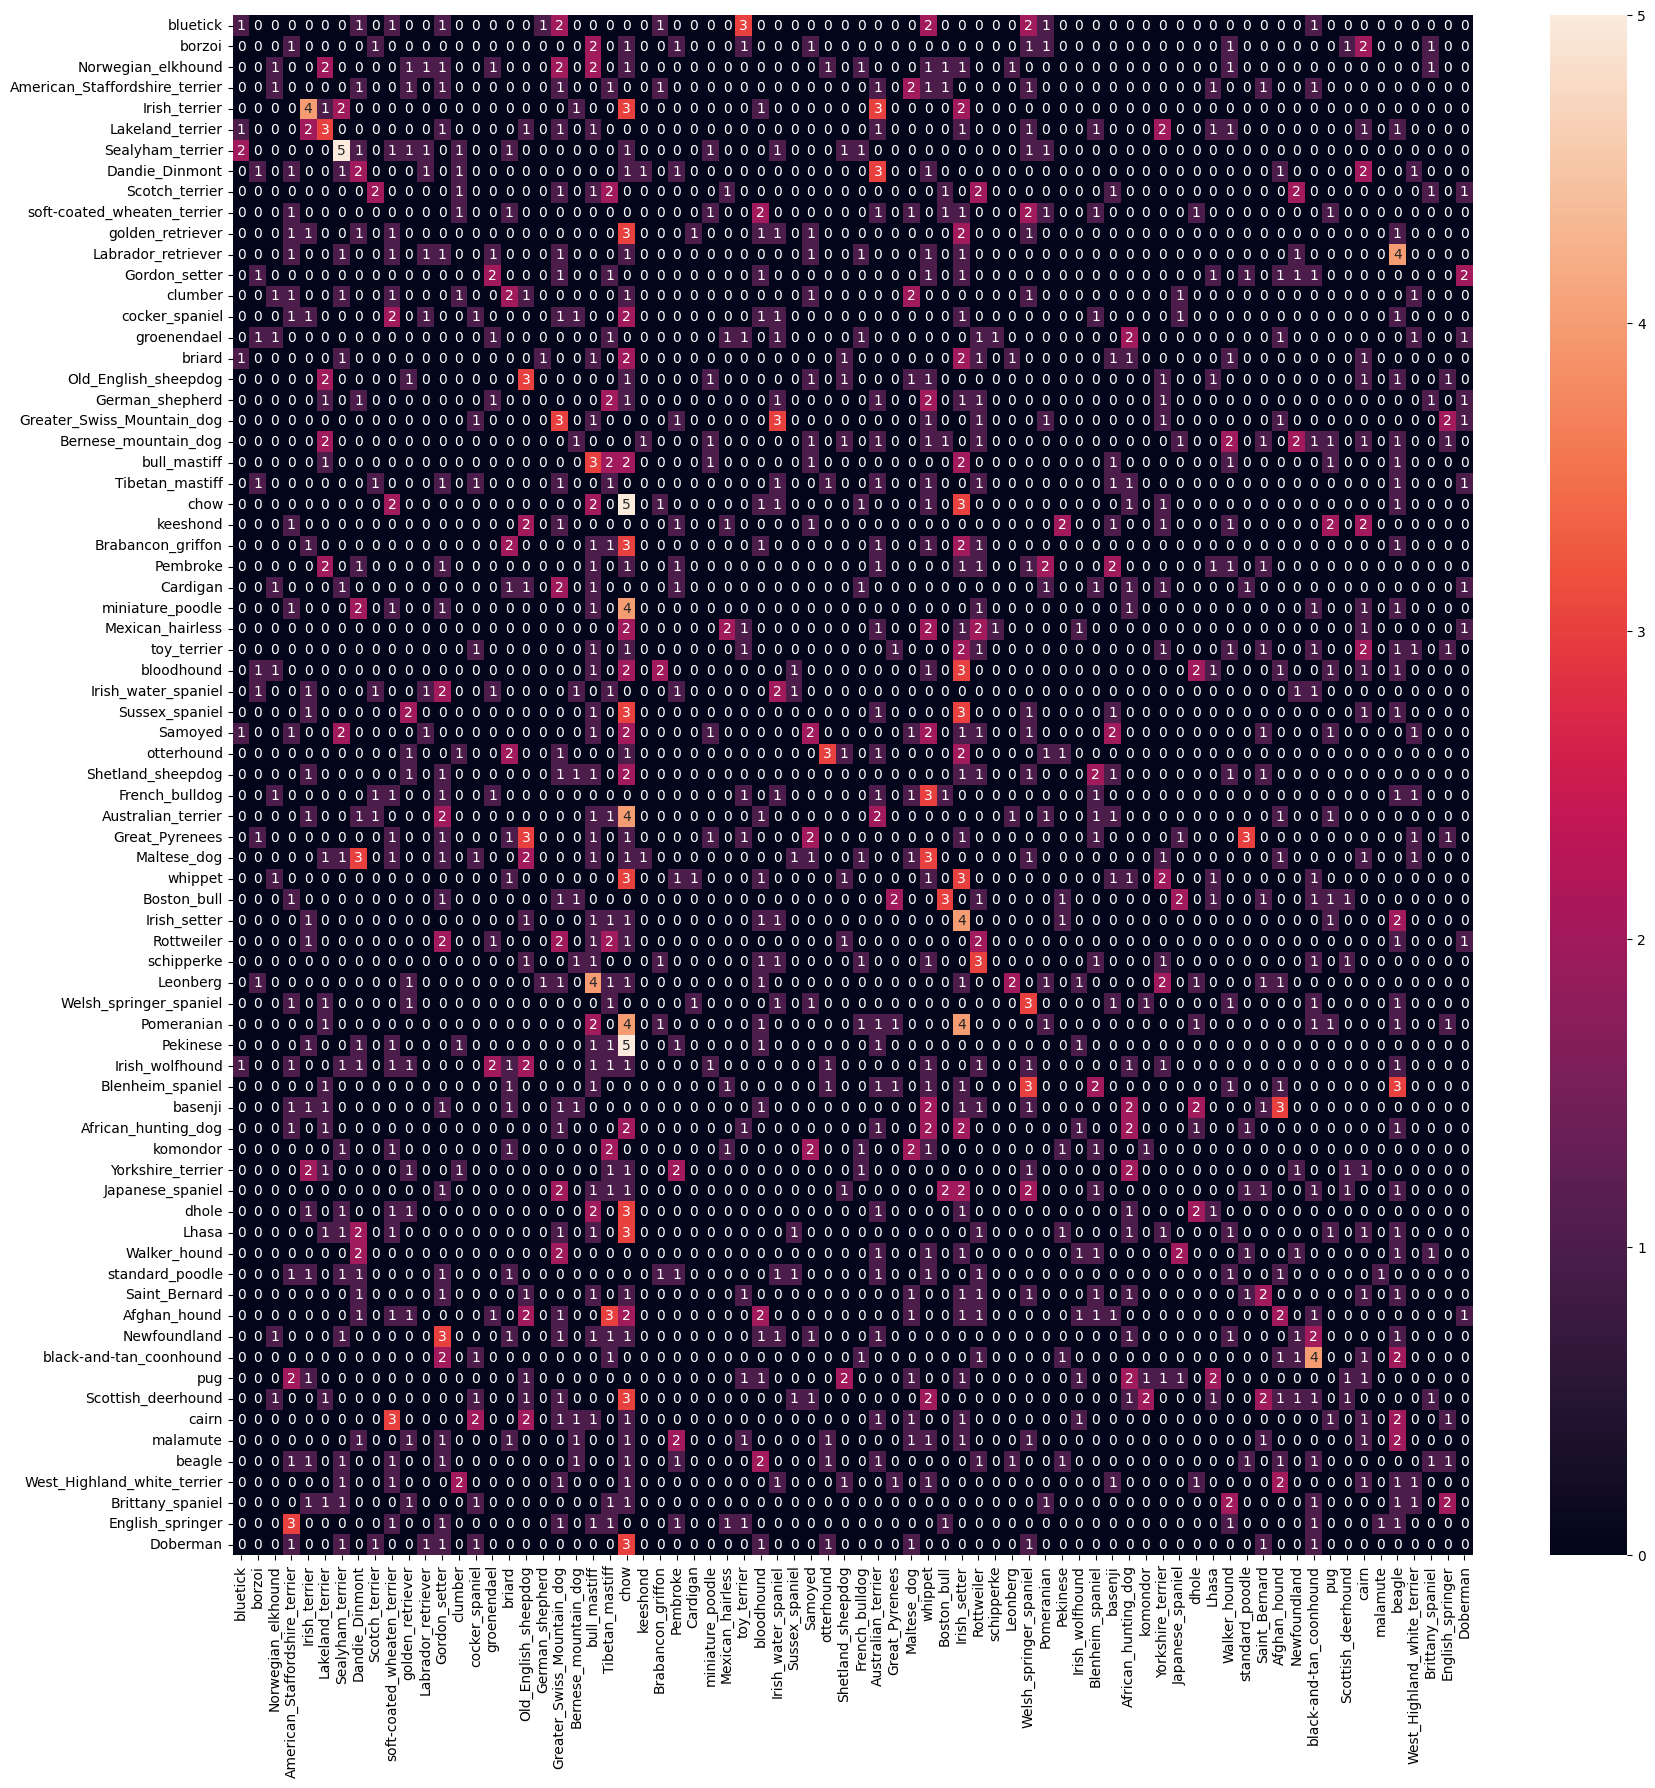

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

---

`Completar aquí`

Este modelo podemos observar que no funciona muy bien, en la matriz de confusión logra acertar alguna predicción pero casi todas las predice de manera incorrecta.

Además, en las curvas de aprendizaje, podemos ver como a apartir de la epoch 2 tiene dificultades para aprender y generalizar nuevos datos.

---


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section6"></a> 
## <font color="#00586D"> 6. Ajuste de hiperparámetros</font>
<br>




En esta sección vamos a intentar mejorar la red anterior con capas `Dropout` y cambiando los hiperparámetros.

La arquitectura de la red es la siguiente:

* Tamaño de entrada será `(100, 120, 3)`.
* Capa convolucional con 32 kernels de tamaño 5x5 con activación *ReLU*.
* Capa *Max Pooling* con reducción de 2.
* Capa *Dropout* con valor 0.5.
* Capa convolucional con 64 kernels de tamaño 5x5 con activación *ReLU*.
* Capa *Max Pooling* con reducción de 2.
* Capa convolucional con 64 kernels de tamaño 5x5 con activación *ReLU*.
* Capa *Max Pooling* con reducción de 2.
* Capa *Dropout* con valor 0.5.
* Capa *Fully connected* con 1024 neuronas con activación *ReLU*.
* Capa *Dropout* con valor 0.2.
* Capa de salida con *softmax*.

Configuración del entrenamiento:
* Función de perdida: `categorical_crossentropy`
* Optimizador: `Adam`
* Learning rate: 0,001
* Epochs: 10
* Tamaño del batch: 128

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100,120,3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
# COMPLETAR:
#   - Crear la red
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=img_size),
    tf.keras.layers.Conv2D(32,(5,5),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(64,(5,5),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(5,5),activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])
model.summary()

#   - Entrena la red
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

#   - Evalúa la red
model.evaluate(test_dataset)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 58, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 58, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 54, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 27, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 23, 64)        1

[3.7153029441833496, 0.11007752269506454]

Obtén las gráficas de evaluación y la matriz de confusión y  extrae conclusiones de estos resultados

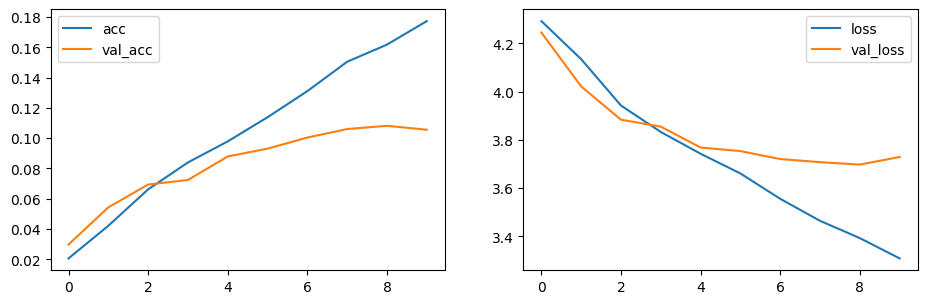

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 4s 319ms/step


<Axes: >

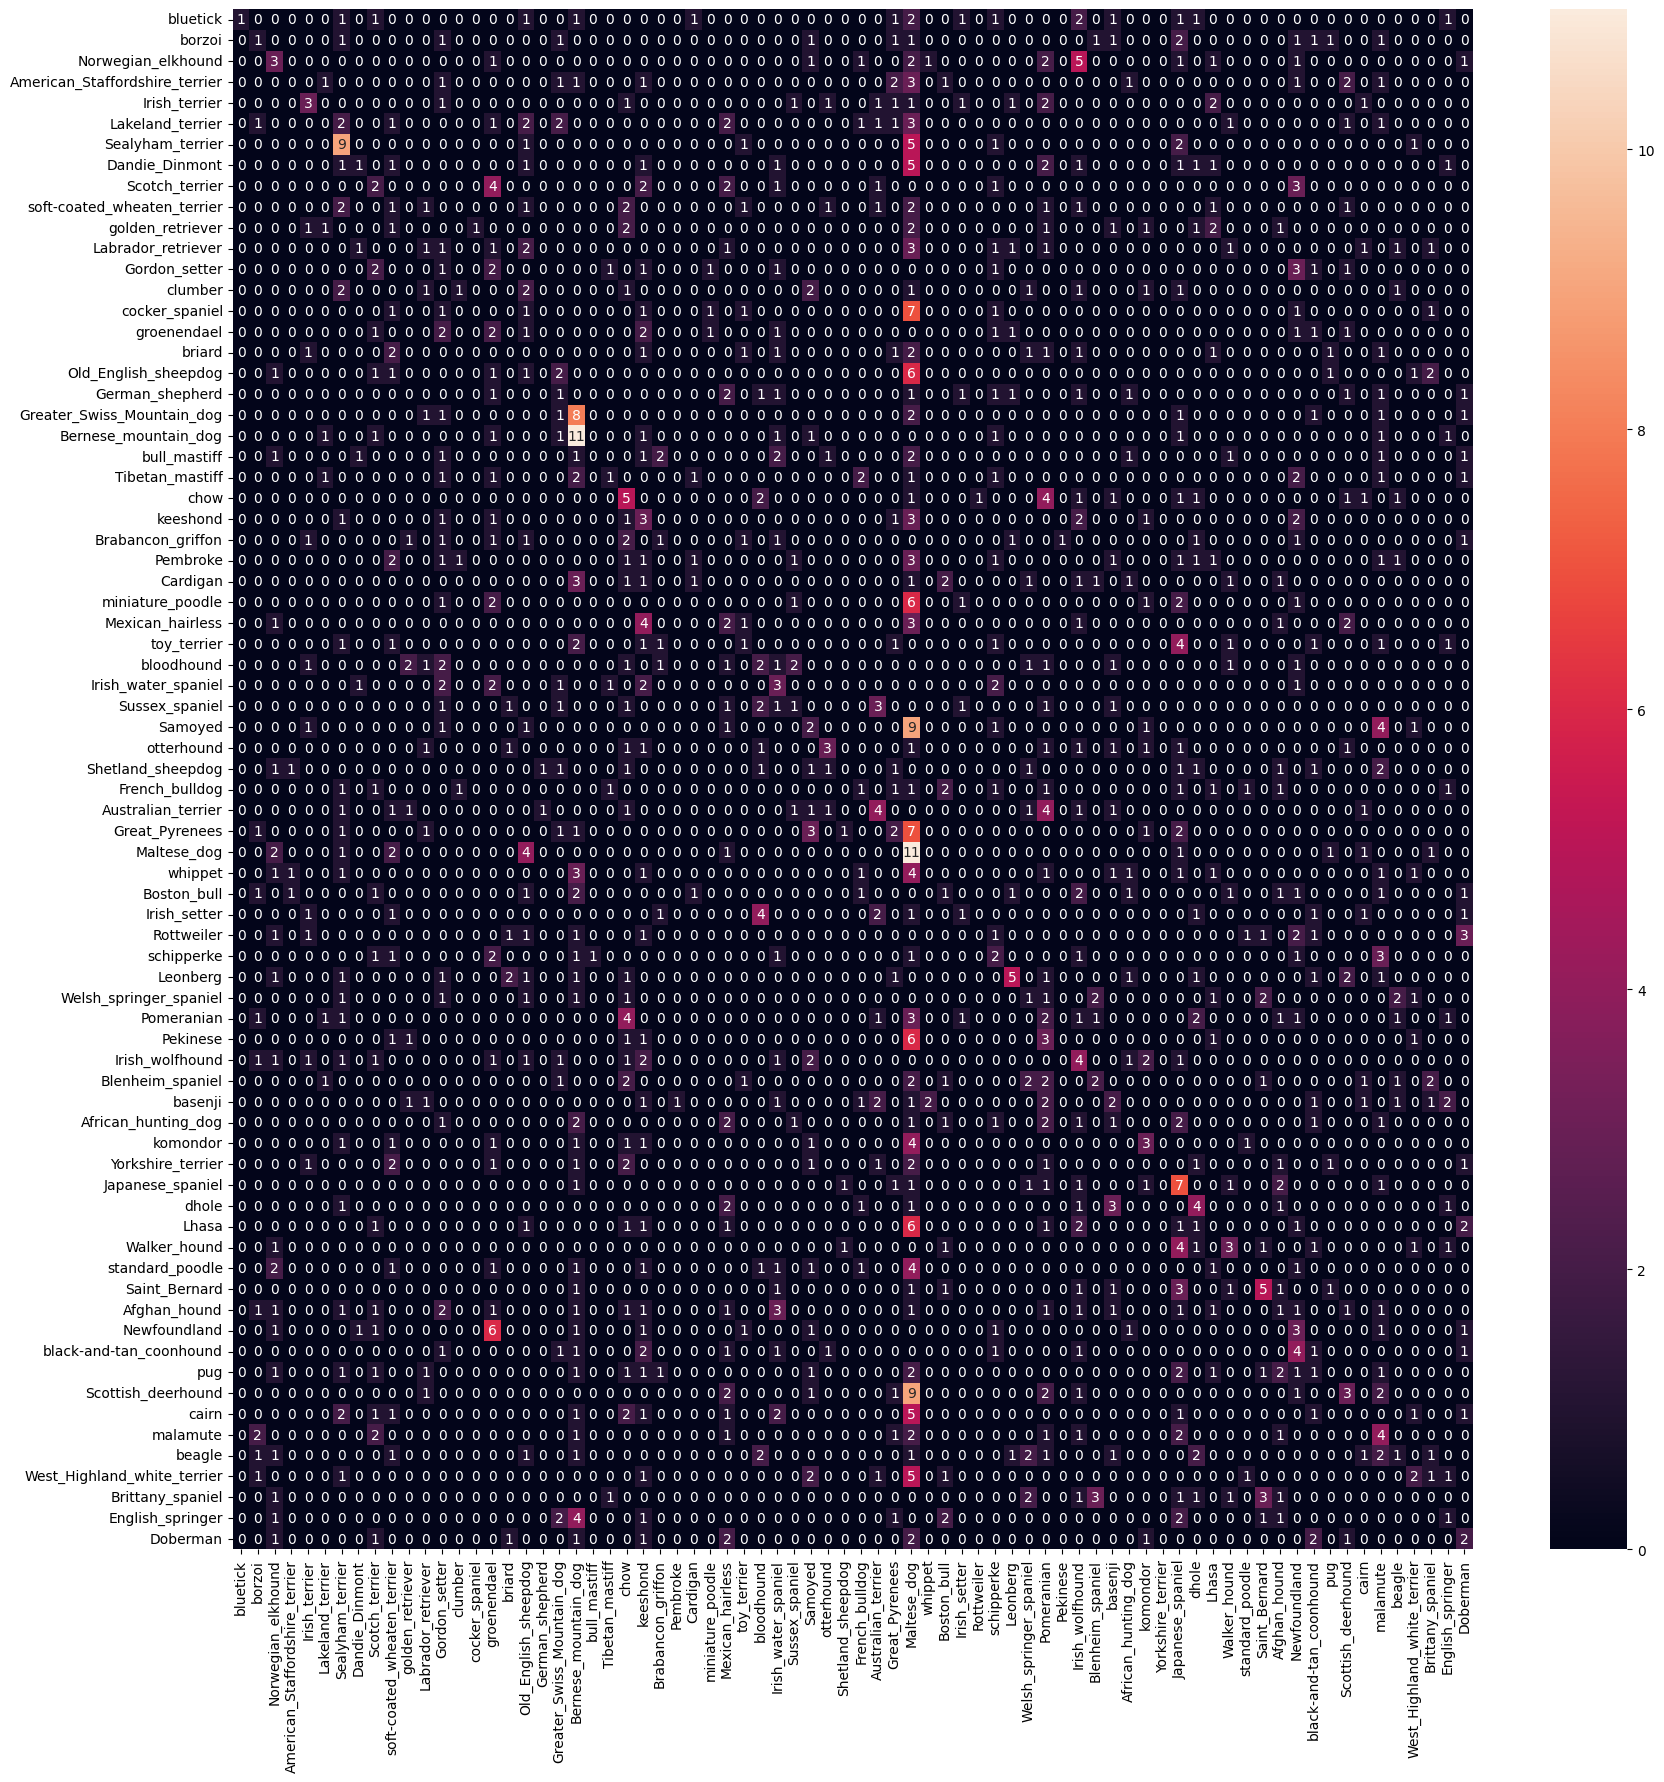

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

---

`Completar aquí`

Este modelo ha mejorado con respecto al anterior.

En la matriz de confusión se observa como el modelo ha clasificado correctamente más imágenes, ya se ajustan más a la diagonal.

Sigue habiendo imágenes mal clasificadas pero mejora con respecto al anterior.


---


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section7"></a> 
## <font color="#00586D"> 7. Modelos pre-entrenados (fine-tunning)</font>
<br>




En esta sección tendréis que utilizar los conocimientos sobre los modelos pre-entrenados y _fine-tunning_, donde tendréis que adaptar una red pre-entrenada a nuestro problema. El modelo pre-entreando que tendréis que usar es _Inception_, cuya versión 3 es de las más utilizadas en _Fine-tuning_ por sus buenos resultados.

### <font color="#00586D"> Inception</font>


La configuración de la red a cargar es la siguiente:

* Tamaño de entrada será `(299, 299, 3)`.
* Elegiremos la configuración `include_top = false` y el `pooling = 'avg'`
* Añadiremos una capa de _Dropout_ de 0.5
* Capa de salida con *softmax*.

Configuración del entrenamiento:
* Función de perdida: `categorical_crossentropy`
* Optimizador: `Adam`
* Epochs: 10
* Tamaño del batch: 128

In [ ]:
# Cargamos datos con las funciones de generación de dataset
# esta vez usams la fucnion de preprocesamiento de inception

preprocess_input = tf.keras.applications.inception_v3.preprocess_input

img_size=(299,299,3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1] ,batch_size=128, prep_func=preprocess_input)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1] ,batch_size=128, prep_func=preprocess_input)
test_dataset = get_dataset(x_test, y_test, img_size[:-1] ,batch_size=128, prep_func=preprocess_input)

In [ ]:
# COMPLETAR:
#   - Crear la red
base_model = tf.keras.applications.inception_v3.InceptionV3(include_top=False, pooling='avg')

x = tf.keras.layers.Dropout(0.5)(base_model.output)
output_layer = tf.keras.layers.Dense(len(classes), activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input,outputs=output_layer)

for layer in base_model.layers:
    layer.trainable = False

#   - Entrena la red
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

#   - Evalúa la red
model.evaluate(test_dataset)

Epoch 1/10
73/73 [==============================] - 1926s 26s/step - loss: 1.5620 - accuracy: 0.7293 - val_loss: 0.3215 - val_accuracy: 0.9470
Epoch 2/10
73/73 [==============================] - 52s 709ms/step - loss: 0.2572 - accuracy: 0.9508 - val_loss: 0.2168 - val_accuracy: 0.9500
Epoch 3/10
73/73 [==============================] - 62s 851ms/step - loss: 0.1818 - accuracy: 0.9573 - val_loss: 0.1936 - val_accuracy: 0.9500
Epoch 4/10
73/73 [==============================] - 62s 841ms/step - loss: 0.1437 - accuracy: 0.9624 - val_loss: 0.1827 - val_accuracy: 0.9505
Epoch 5/10
73/73 [==============================] - 51s 699ms/step - loss: 0.1267 - accuracy: 0.9648 - val_loss: 0.1766 - val_accuracy: 0.9492
Epoch 6/10
73/73 [==============================] - 62s 853ms/step - loss: 0.1052 - accuracy: 0.9721 - val_loss: 0.1763 - val_accuracy: 0.9483
Epoch 7/10
73/73 [==============================] - 51s 694ms/step - loss: 0.0993 - accuracy: 0.9714 - val_loss: 0.1744 - val_accuracy: 0.9487

[0.13262368738651276, 0.9534883499145508]

Obtén las gráficas de evaluación y la matriz de confusión y  extrae conclusiones de estos resultados

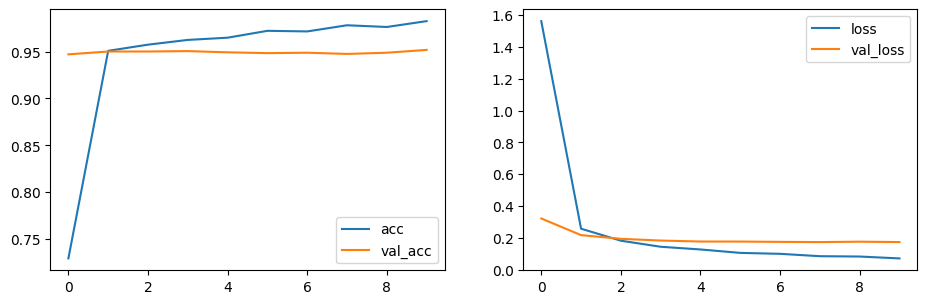

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 9s 645ms/step


<Axes: >

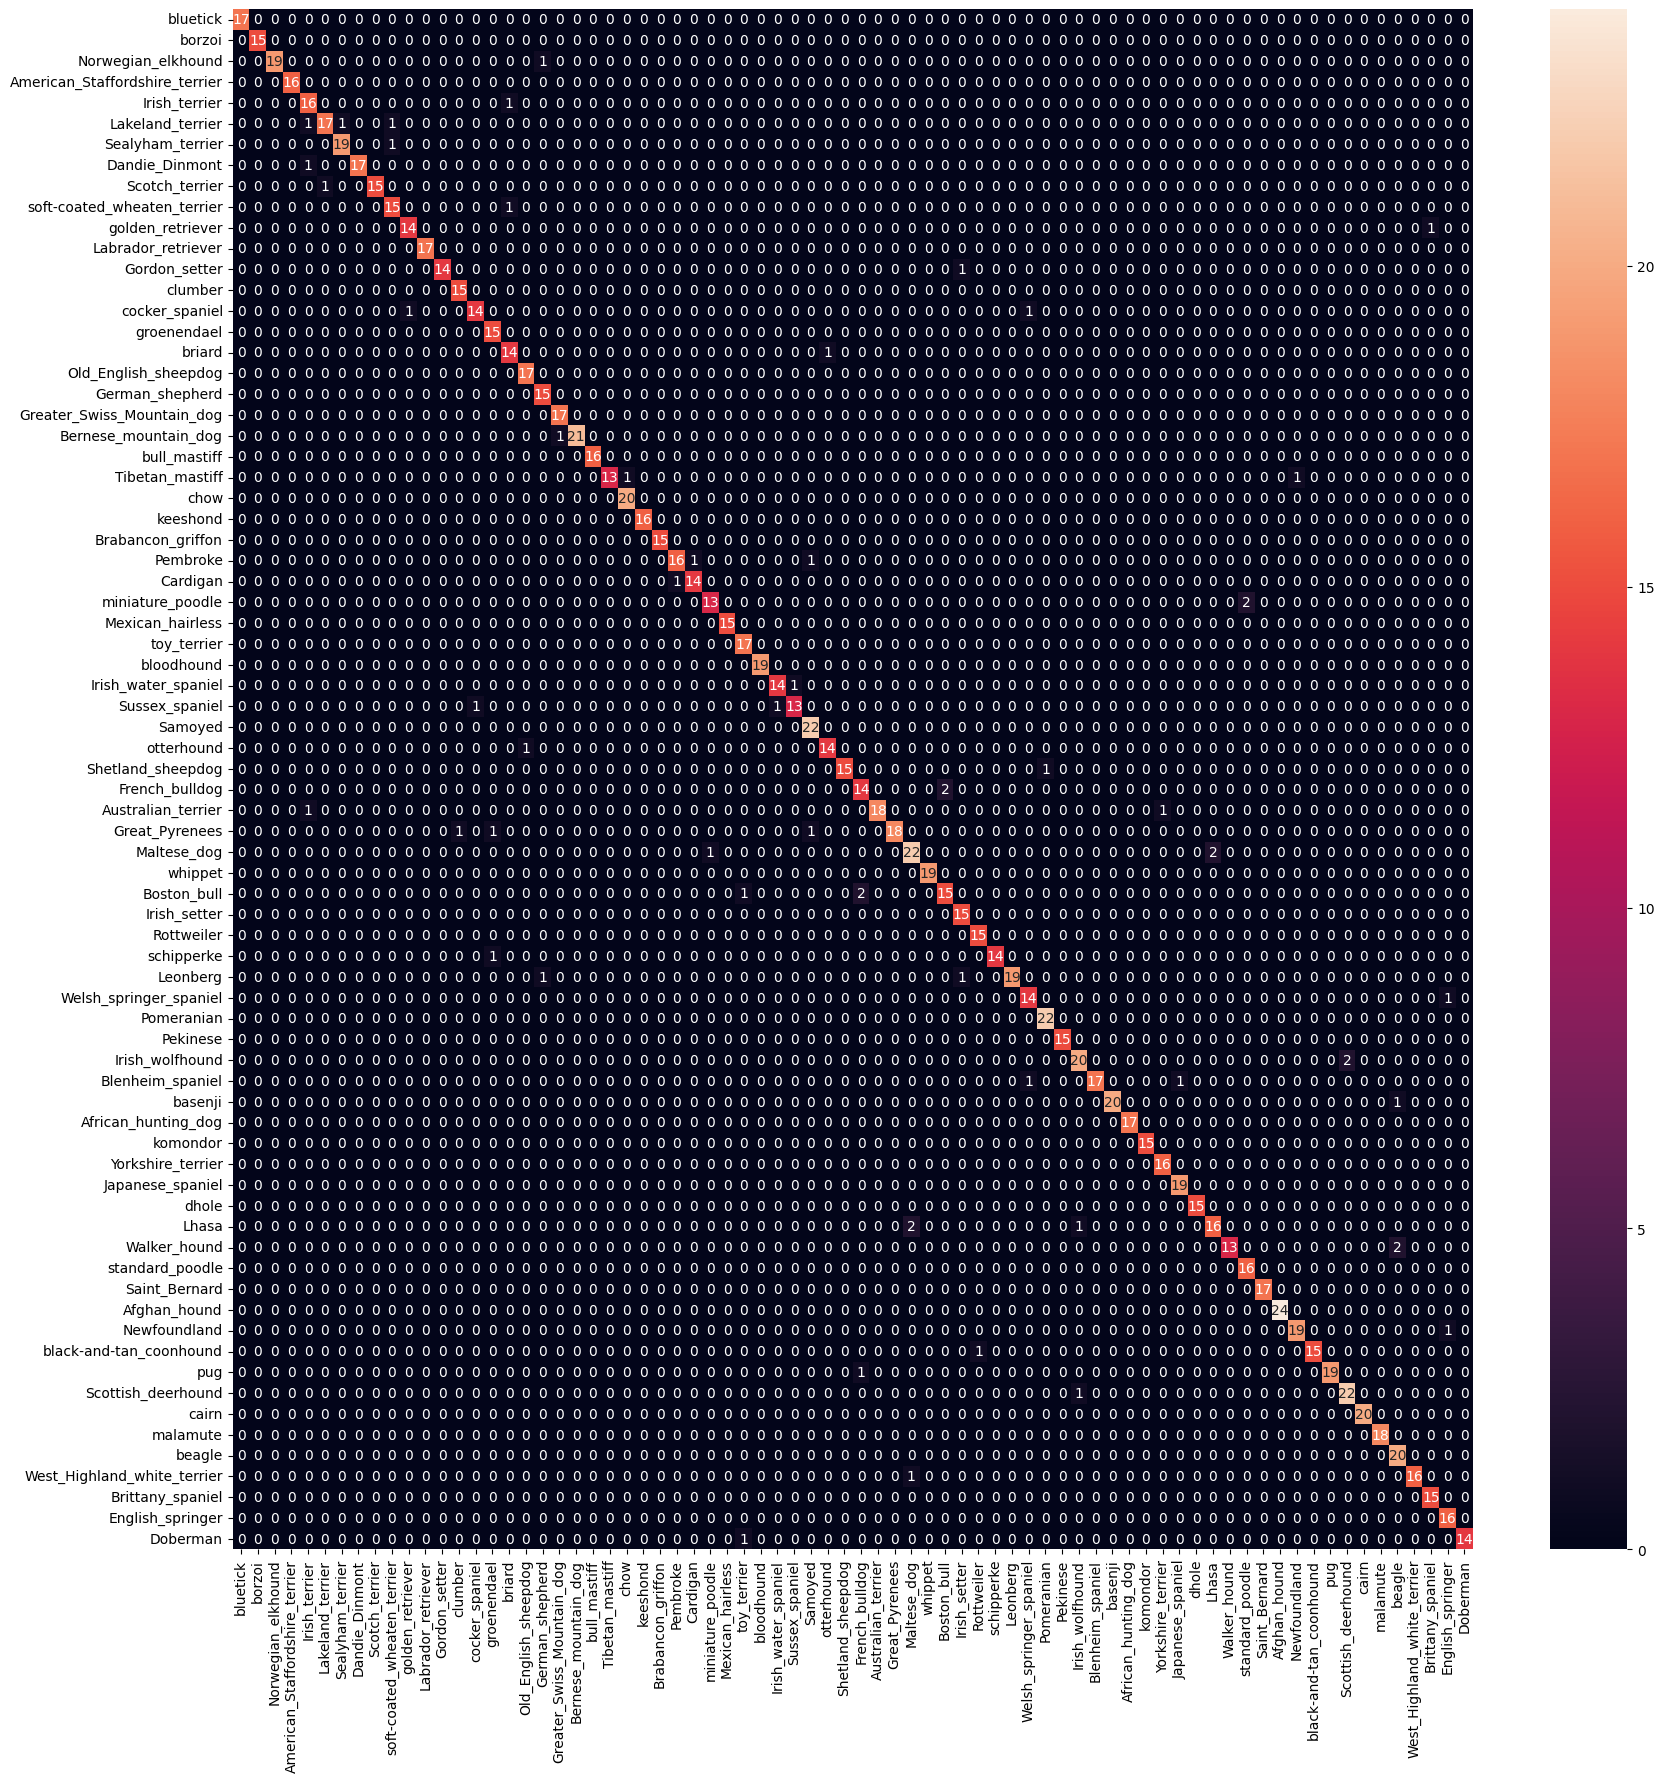

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

---

`Completar aquí`

Podemos observar que este modelo es muy bueno, en la matriz de confusión logra clasificar la mayoría de las muestras.

Las gráficas de evaluación se ve que el aprendizaje del modelo es muy bueno, es posible que este problema de clasificación ya se logró resolver con el modelo de Inception.

---


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section8"></a> 
## <font color="#00586D"> 8. Data augmentation</font>
<br>





En este apartado se deberán aplicar algunas de las funciones de preprocesamiento vistas en la clase de _data augmentation_. Nos centraremos en *data augmentation* estocástico sobre la red obtenida en el apartado de modelos desde 0 y tratar de mejorar el rendimiento. Vamos a utilizar una o varias de las siguientes modificaciones:

  *    Flip horizontal
  *    Flip vertical
  *    Contraste

La arquitectura de la red debe ser siguiente:
* Tamaño de entrada será `(100, 120, 3)`.
* Capa convolucional con 32 kernels de tamaño 5x5 con activación *ReLU*.
* Capa *Max Pooling* con reducción de 2.
* Capa convolucional con 64 kernels de tamaño 5x5 con activación *ReLU*.
* Capa *Max Pooling* con reducción de 2.
* Capa *Fully connected* con 1024 neuronas con activación *ReLU*.
* Capa de salida con *softmax*.

Configuración del entrenamiento:
* Función de perdida: `categorical_crossentropy`
* Optimizador: `Adam`
* Learning rate: 0,001
* Epochs: 10
* Tamaño del batch: 128

In [ ]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100,120,3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [ ]:
# COMPLETAR:
#   - Crear la red
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=img_size),
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomFlip('vertical'),
    tf.keras.layers.RandomContrast(0.2),
    tf.keras.layers.Conv2D(32,(5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Conv2D(64,(5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(len(classes), activation='softmax')
])

model.summary()

#   - Entrena la red
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

#   - Evalúa la red
model.evaluate(test_dataset)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_7 (RandomFlip)  (None, 100, 120, 3)       0         
                                                                 
 random_flip_8 (RandomFlip)  (None, 100, 120, 3)       0         
                                                                 
 random_contrast_3 (RandomCo  (None, 100, 120, 3)      0         
 ntrast)                                                         
                                                                 
 conv2d_6 (Conv2D)           (None, 96, 116, 32)       2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 48, 58, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 44, 54, 64)       

[4.457852363586426, 0.10465116053819656]

Obtén las gráficas de evaluación y la matriz de confusión y  extrae conclusiones de estos resultados

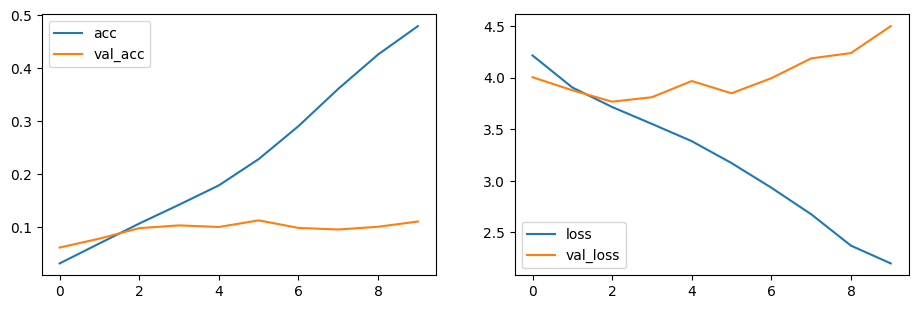

In [ ]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 4s 315ms/step


<Axes: >

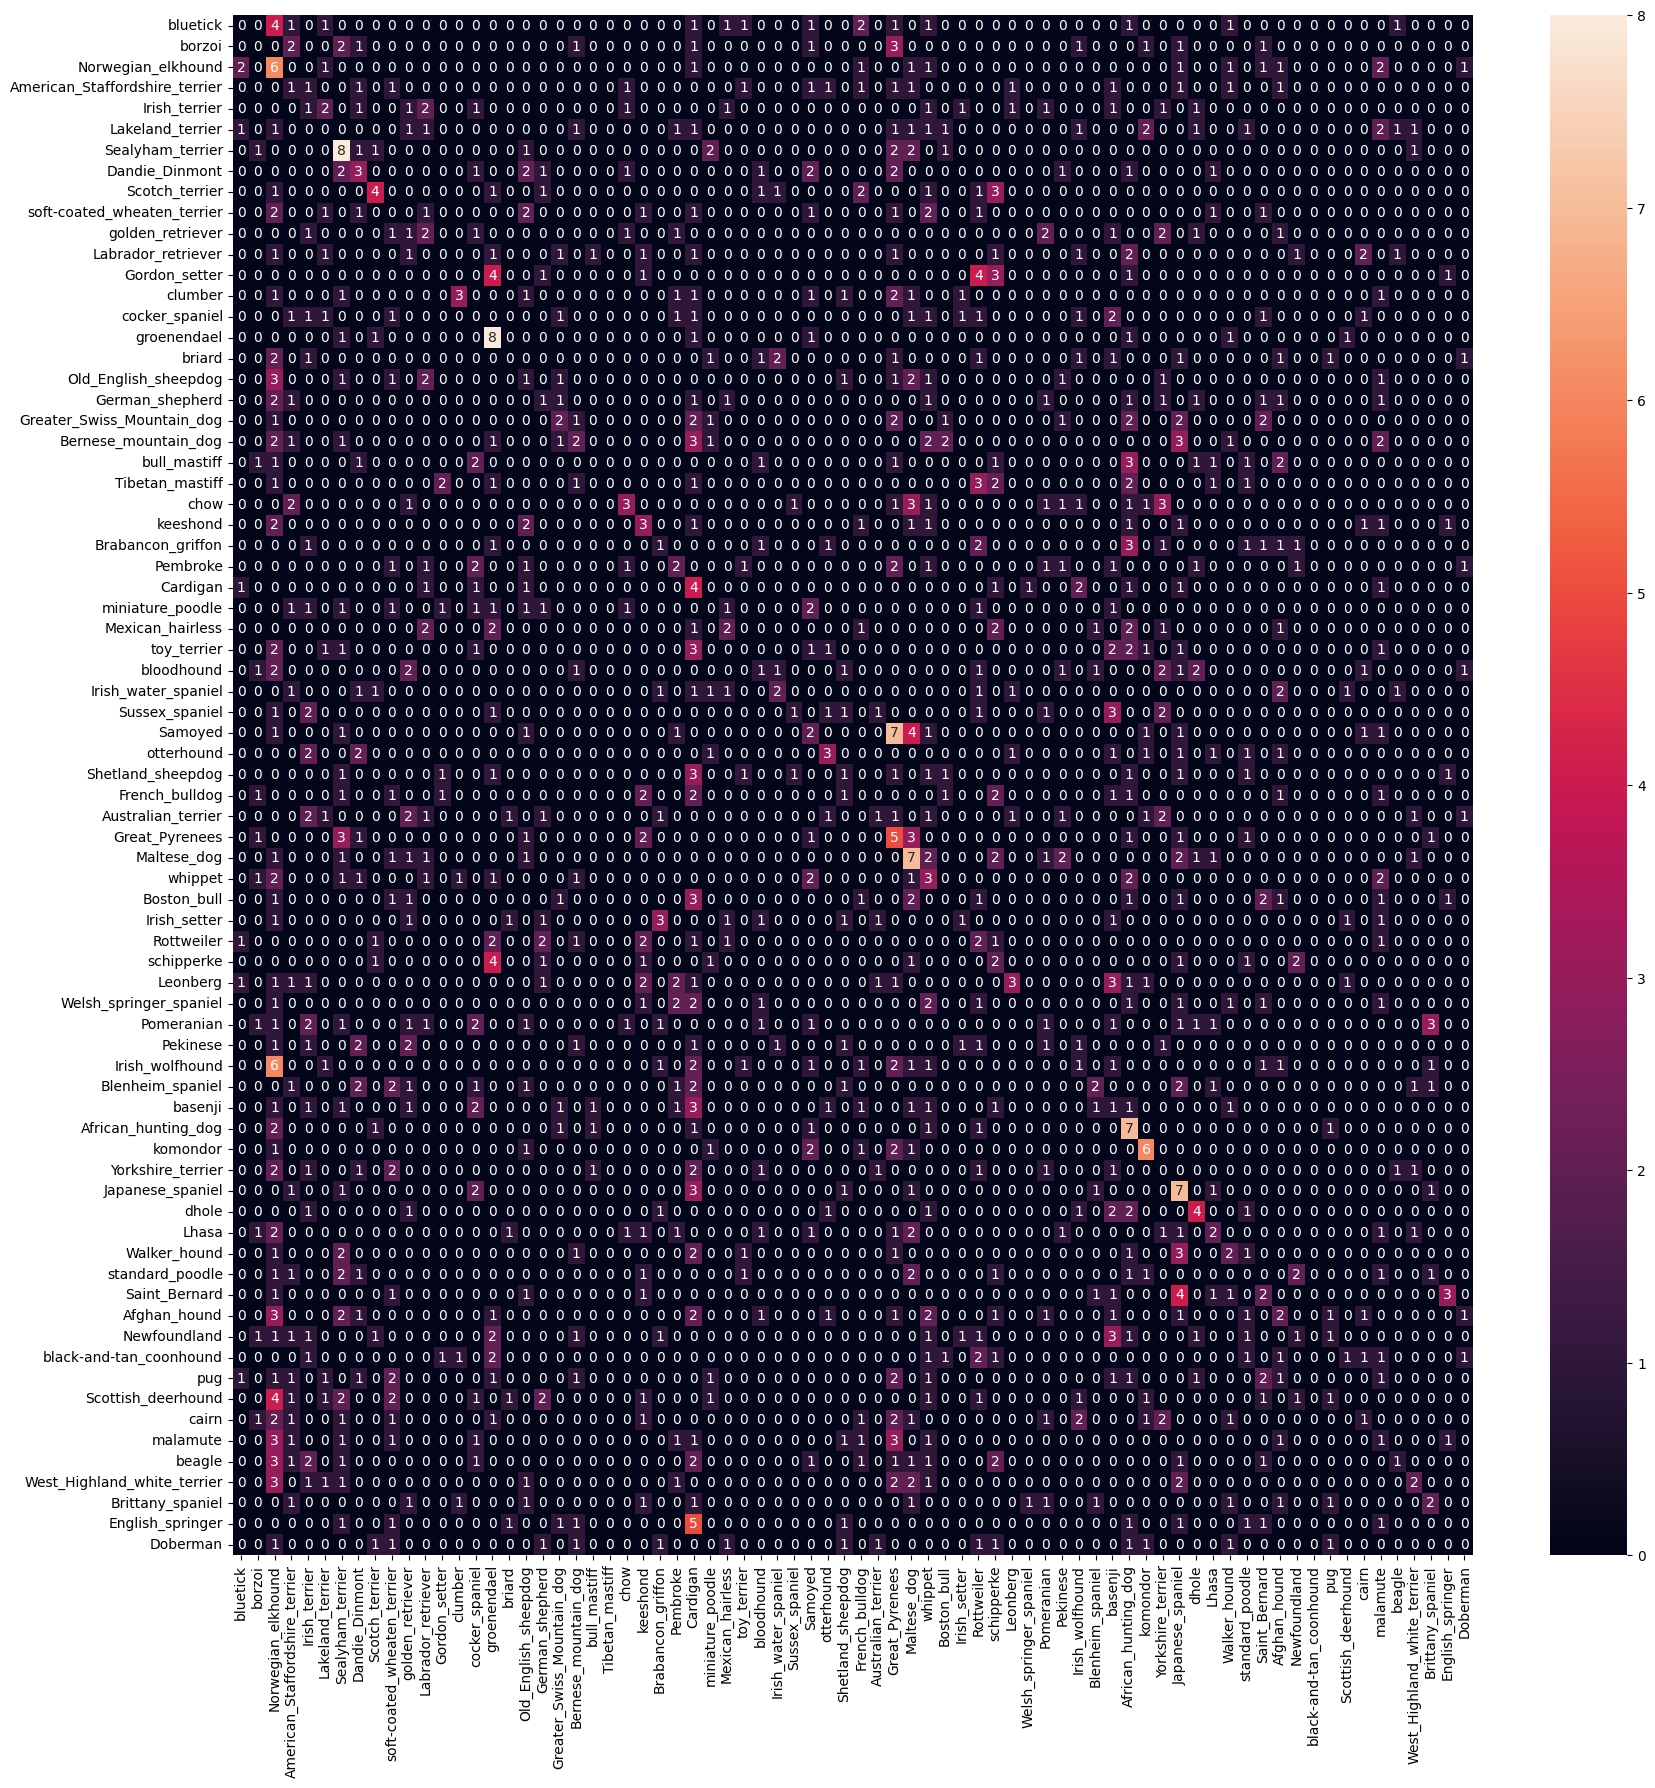

In [ ]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

---

`Completar aquí`

Usando el aumento de datos, el modelo es muy similar al creado desde cero. 
Añadir más imágenes para entrenar beneficia al aprendizaje pero seguro que añadir alguún hiperparámetro lo mejoraría más.

La matriz de confusión clasifica alguna imágen de manera correcta pero falla bastantes.

En las gráficas podemos observar que el modelo se está desempeñando cada vez peor a medida que avanza el entrenamiento.

---


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section9"></a> 
## <font color="#00586D"> AutoKeras (opcional) </font>
<br>


En este experimentos vamos a utilizar AutoKeras para realizar el entrenamiento. Nos centraremos en utilizar el bloque `ImageClassifier` a alto nivel, con tan solo un `max_trials` de 1 ya que será un experimento muy costoso computacionalmente.

La arquitectura de la red debe ser siguiente:
* Tamaño de entrada será `(100, 120, 3)`.
* Bloque `ImageClassifier` con la siguiente configuración:
  - `max_trials` de 1
  - En `metrics` incluye el `accuracy`
  - `overwrite` a `True`

  En este tipo de bloque puedes pasarle al parámetro `x` un `tf.data.Dataset` al igual que al parámetros `validation_data`.

Configuración del entrenamiento:
* Epochs: 10
* Callbacks: usa `EarlyStopping` con un `patience` de 2 para terminar antes el entrenamiento si el modelo deja de aprender.

In [8]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 466.8/466.8 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 KB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 78.6 MB/s eta 0:00:00


In [9]:
import autokeras as ak

In [10]:
print(ak.__version__)
print(tf.__version__)

1.1.0
2.12.0


In [11]:
# Cargamos datos con las funciones de generación de dataset
img_size = (100,120,3)
train_dataset = get_dataset(x_train, y_train, img_size[:-1], 128)
valid_dataset = get_dataset(x_valid, y_valid, img_size[:-1], 128)
test_dataset = get_dataset(x_test, y_test, img_size[:-1], 128)

In [12]:
# COMPLETAR:
#   - Crear la red
model = ak.ImageClassifier(max_trials=1, metrics=['accuracy'], overwrite=True)
#   - Entrena la red
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)
#   - Evalúa la red
model.evaluate(test_dataset)

Trial 1 Complete [00h 34m 53s]
val_loss: 4.0636210441589355

Best val_loss So Far: 4.0636210441589355
Total elapsed time: 00h 34m 53s
Epoch 1/10
73/73 [==============================] - 146s 2s/step - loss: 4.8946 - accuracy: 0.0264 - val_loss: 4.1919 - val_accuracy: 0.0349
Epoch 2/10
73/73 [==============================] - 146s 2s/step - loss: 3.7638 - accuracy: 0.1209 - val_loss: 4.0337 - val_accuracy: 0.0767
Epoch 3/10
73/73 [==============================] - 157s 2s/step - loss: 2.4765 - accuracy: 0.3998 - val_loss: 4.3322 - val_accuracy: 0.0784
Epoch 4/10
73/73 [==============================] - 146s 2s/step - loss: 1.0748 - accuracy: 0.7284 - val_loss: 5.3383 - val_accuracy: 0.0758
Epoch 5/10
73/73 [==============================] - 148s 2s/step - loss: 0.4512 - accuracy: 0.8833 - val_loss: 5.9637 - val_accuracy: 0.0797
Epoch 6/10
73/73 [==============================] - 145s 2s/step - loss: 0.2421 - accuracy: 0.9406 - val_loss: 6.4818 - val_accuracy: 0.0793
Epoch 7/10
73/73 [==

11/11 [==============================] - 165s 13s/step - loss: 7.4312 - accuracy: 0.0682


[7.43115758895874, 0.06821705400943756]

In [15]:
model.export_model().summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 120, 3)]     0         
                                                                 
 cast_to_float32 (CastToFloa  (None, 100, 120, 3)      0         
 t32)                                                            
                                                                 
 normalization (Normalizatio  (None, 100, 120, 3)      7         
 n)                                                              
                                                                 
 conv2d (Conv2D)             (None, 98, 118, 32)       896       
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 116, 64)       18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 58, 64)       0     

Obtén las gráficas de evaluación y la matriz de confusión y  extrae conclusiones de estos resultados

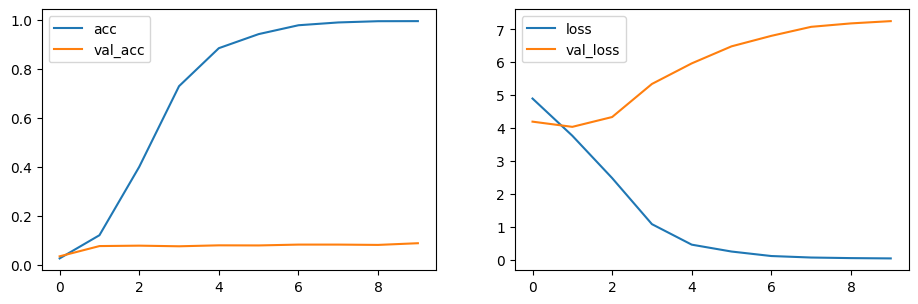

In [13]:
# Visualizamos la evolución de los epochs
fig=plt.figure(figsize=(60, 40))

# error
fig.add_subplot(10, 10, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

# precision
fig.add_subplot(10, 10, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

plt.show()

11/11 [==============================] - 7s 614ms/step


<Axes: >

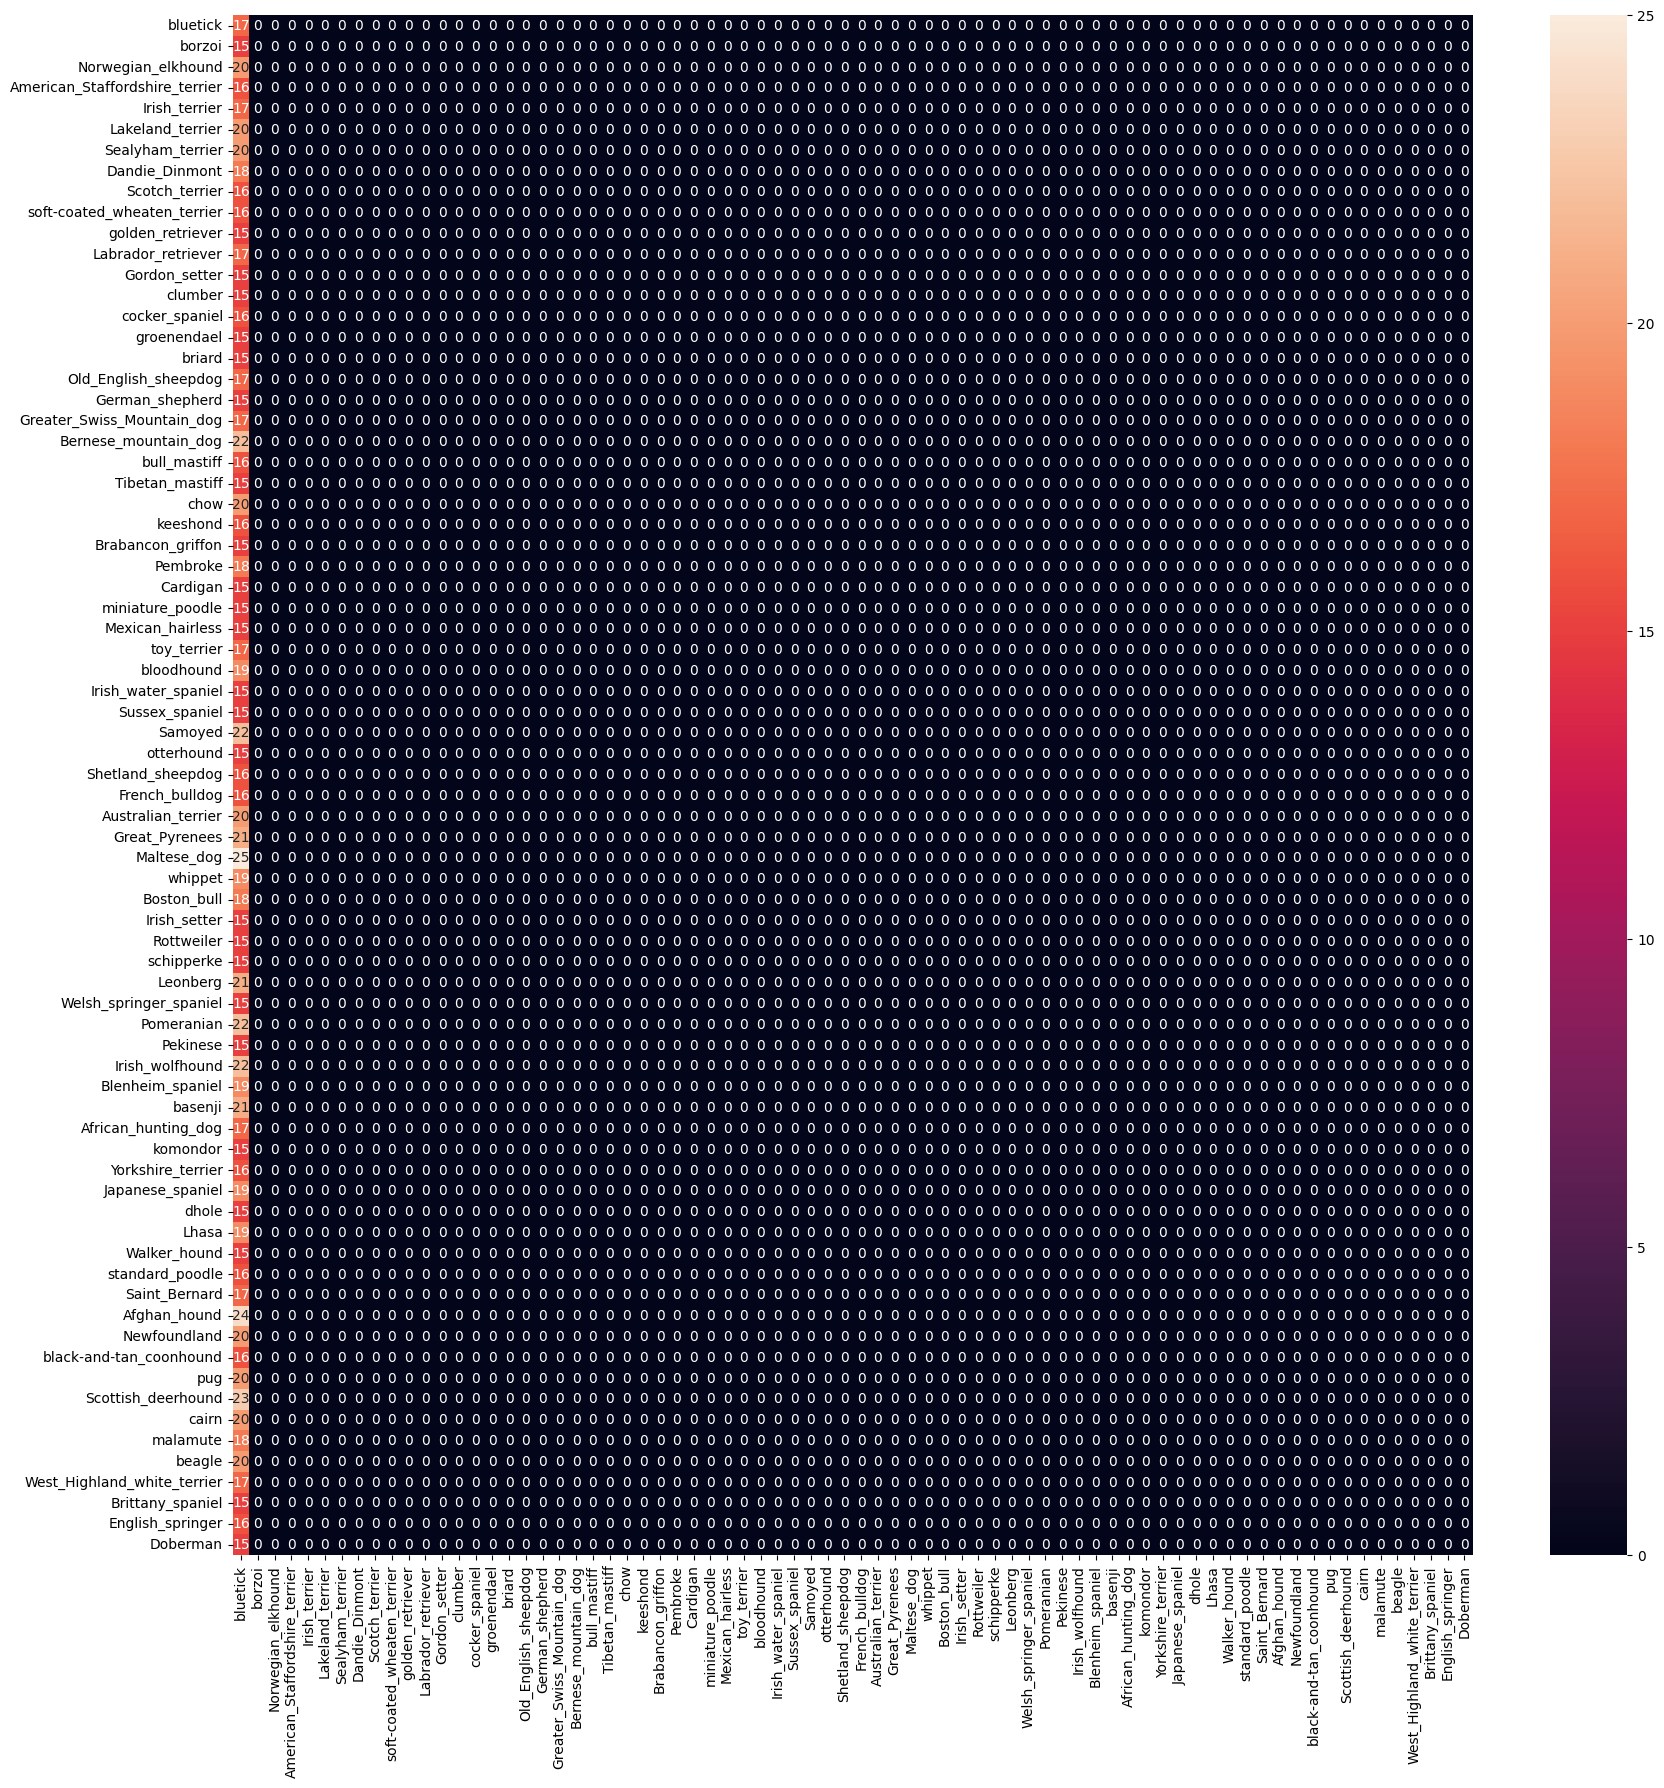

In [14]:
# Visualizamos la matriz de confusion
predictions = model.predict(test_dataset)
y_pred = np.argmax(predictions, axis=1)
y_true= y_test
confusion_matrix = metrics.confusion_matrix(y_true=y_true, y_pred=y_pred)

df_cm=pd.DataFrame(confusion_matrix, index = [i for  i in classes], columns = [i for i in classes])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

---

`Completar aquí`

Al ser tan costoso computacionalmente solo podemos hacer una prueba, por lo que el modelo que obtenemos no es bueno, además al hacer solo 10 epochs, no ha podido escoger un modelo muy efectivo, con lo que más entrenamientos seguro que los mejoraría.

Como muestran las gráficas el modelo no aprende demasiado.

---


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="sectionopt"></a> 
## <font color="#00586D"> Conclusión</font>
<br>


Una vez realizado todos los experimentos anteriores, ¿qué modelo elegirías para desplegar en producción? ¿Por qué? 

Explica en breves palabras qué modelo eligirías para desplegar en producción y porqué. Compara cada experimento y extráe tus propias conclusiones.

---

`Completar aquí`

Según los resultados obtenidos el mejor modelo para poner en producción sería el que usa fine-tunning, ya que tiene la menor pérdida y la mayor precisión en el conjunto de datos de prueba.

---


<div style="text-align: center; font-size: 24px;">
    <img src="https://drive.google.com/uc?id=1xHx0M9NUXi4YcDyi1BwuUE6y0TK0kHfs">
</div>

####  ¡Si has llegado hasta aquí deberías estar super orgullos@!  Ya puedes relajar tus neuronas, les has dado mucho trabajo



<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<div align="right">
<a href="#indice"><font size=6 color="#00586D"><i class="fa fa-coffee" aria-hidden="true"></i></font></a>
</div>